#CS 483 Project
###Group GPT

#Sentiment Analysis

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               Title  \
0  GPT-3.5 vs. GPT-4 – A comparison in logical ac...   
1                      Clear example of ChatGPT bias   
2                    Questionable sexuality bias...?   
3  RightWingGPT – An AI Manifesting the Opposite ...   
4  Is Chat GBT have a bias toward physicalism and...   

                                                Text  Polarity  Subjectivity  
0  GPT-3.5 vs. GPT-4 – A comparison in logical ac...  0.250000      0.250000  
1                      Clear example of ChatGPT bias  0.100000      0.383333  
2  *(Both prompts were given in their own fresh t...  0.264152      0.588905  
3  RightWingGPT – An AI Manifesting the Opposite ...  0.000000      0.050000  
4  When asking about spiritual topics, Chat GBT k...  0.062500      0.533333  


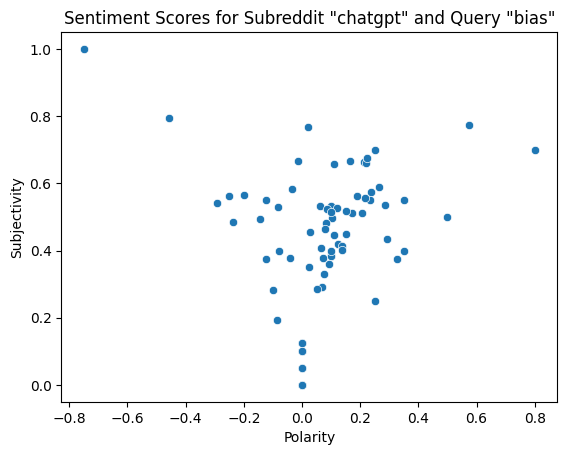

In [ ]:
import praw
from textblob import TextBlob
import pandas as pd
import seaborn as sns

query = 'bias'
subreddit_name = 'chatgpt'
limit = 100

client_id = 'EkgggRiSIn1OUAMxZeCTfA'
client_secret = '0RphWUYoRz1ByW6OL-nshYo4mwpnDg'
username = 'Kiiii19'
password = 'CS483project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

# Search for posts containing the query in a specific subreddit
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(query, limit=limit)
sentiment_scores = []
for post in posts:
    title = post.title
    text = post.selftext
    if text == '':
        text = title
    # Use TextBlob to compute the sentiment scores
    blob = TextBlob(text)
    sentiment_scores.append((title, text, blob.sentiment.polarity, blob.sentiment.subjectivity))

df = pd.DataFrame(sentiment_scores, columns=['Title', 'Text', 'Polarity', 'Subjectivity'])
print(df.head())

sns.scatterplot(data=df, x='Polarity', y='Subjectivity')
plt.title(f'Sentiment Scores for Subreddit "{subreddit_name}" and Query "{query}"')
plt.show()

#Natural Language Processing and Clustered Text w/ K-means Algorithm (WordCloud)

In [ ]:
!pip install -q praw
!pip install -q nltk
!pip install -q scikit-learn
import praw
import nltk  #pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer  #pip install scikit-learn
from sklearn.cluster import KMeans
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 3.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install -q praw
!pip install -q nltk
import praw
import nltk
nltk.download('vader_lexicon')
import re
# Authenticate with Reddit's API using your client ID and secret
client_id = 'DvX_C3gFsKweI0O6_u9vag'
client_secret = 'YfLv9dz1RRs7oA7RROkJ-BtfkhiQSA'
username = 'checkary'
password = 'CS483Project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

# Define the query parameters for your search
query = 'racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs or slur OR race'
subreddit_name = 'chatgpt'
query2 = '(racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs OR slur OR race) AND chatgpt'
subreddit_name2 = 'openai'
query3 = '(racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs OR slur OR race) AND chatgpt'
subreddit_name3 = 'artificial'
limit = 300

# Search for posts containing the query in a specific subreddit
subreddit = reddit.subreddit(subreddit_name)
subreddit2 = reddit.subreddit(subreddit_name2)
subreddit3 = reddit.subreddit(subreddit_name3)
posts = subreddit.search(query, limit=limit)
posts2 = subreddit2.search(query2, limit=limit)
posts3 = subreddit3.search(query3, limit=limit)

f = open("redditData_racistInChatGPT2.txt", "w", encoding="utf-8")
for post in posts:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
for post in posts2:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
for post in posts3:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
f.close()

In [ ]:
# Open the input file and read the contents
with open("redditData_racistInChatGPT2.txt", "r", encoding="utf-8") as input_file:
    input_text = input_file.read()

# Remove all non-words (i.e., any character that is not a letter or space)
text = re.sub(r"[^a-zA-Z\s]+", "", text)

# Open the output file and write the cleaned text to it
with open("cleaned_reddit_data2.txt", "w", encoding="utf-8") as f:
    f.write(text)

# Open the file and read the lines
with open('cleaned_reddit_data2.txt', 'r', encoding="utf-8") as f:
    lines = f.readlines()

In [ ]:
# Load the data
with open('cleaned_reddit_data2.txt', 'r', encoding="utf-8") as f:
    data = f.readlines()

# Tokenize the data
tokenized_data = []
for post in data:
    tokens = nltk.word_tokenize(post)
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token.lower())
        else:
            filtered_tokens.append(token)
    tokenized_data.append(filtered_tokens)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_data = []
for post in tokenized_data:
    filtered_post = [word for word in post if word not in stop_words]
    filtered_data.append(filtered_post)

# Convert to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([' '.join(post) for post in filtered_data])

# Apply clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Print the cluster labels and posts
for i in range(5):
    cluster_posts = []
    for j, label in enumerate(kmeans.labels_):
        if label == i:
            cluster_posts.append(data[j])
    print(f"Cluster {i}:")
    print("------------------------")
    print(''.join(cluster_posts))
    print("\n")

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for each cluster
for i in range(3):
    cluster_posts = []
    for j, label in enumerate(kmeans.labels_):
        if label == i:
            cluster_posts.append(data[j])
    cluster_text = ' '.join(cluster_posts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}')
    plt.show()

#Natural Language Processing and Sentiment Analysis (Heatmap)

In [ ]:
!pip install -q praw
!pip install -q nltk
import praw
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
import re
# Authenticate with Reddit's API using your client ID and secret
client_id = 'DvX_C3gFsKweI0O6_u9vag'
client_secret = 'YfLv9dz1RRs7oA7RROkJ-BtfkhiQSA'
username = 'checkary'
password = 'CS483Project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

# Define the query parameters for your search
query = 'racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs or slur OR race'
subreddit_name = 'chatgpt'
query2 = '(racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs OR slur OR race) AND chatgpt'
subreddit_name2 = 'openai'
query3 = '(racist OR racism OR racialism OR racial OR black OR white OR asian OR indian OR mexican OR african OR slurs OR slur OR race) AND chatgpt'
subreddit_name3 = 'artificial'
limit = 300

# Search for posts containing the query in a specific subreddit
subreddit = reddit.subreddit(subreddit_name)
subreddit2 = reddit.subreddit(subreddit_name2)
subreddit3 = reddit.subreddit(subreddit_name3)
posts = subreddit.search(query, limit=limit)
posts2 = subreddit2.search(query2, limit=limit)
posts3 = subreddit3.search(query3, limit=limit)

f = open("redditData_racistInChatGPT2.txt", "w", encoding="utf-8")
for post in posts:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
for post in posts2:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
for post in posts3:
    if "racist" in post.title or "racist" in post.selftext or "race" in post.title or "race" in post.selftext or "racism" in post.title or "racism" in post.selftext or "racialism" in post.title or "racialism" in post.selftext or "racial" in post.title:
        f.write(f"{post.title} ")
        f.write(f"{post.selftext}".replace("\n", " ").replace("\t", " "))
        try:
            if "racial" in post.comment or "race" in post.comment or "racism" in post.comment or "racialism" in post.comment or "racial" in post.comment:
                f.write(f"{post.comment}".replace("\n", " ").replace("\t", " "))
                f.write("\n")
                continue
        except:
            f.write("\n")
            continue
f.close()

In [ ]:
# Open the input file and read the contents
with open("redditData_racistInChatGPT2.txt", "r", encoding="utf-8") as input_file:
    input_text = input_file.read()

# Remove all non-words (i.e., any character that is not a letter or space)
text = re.sub(r"[^a-zA-Z\s]+", "", input_text)

# Open the output file and write the cleaned text to it
with open("cleaned_reddit_data2.txt", "w", encoding="utf-8") as f:
    f.write(text)

# Open the file and read the lines
with open('cleaned_reddit_data2.txt', 'r', encoding="utf-8") as f:
    data = f.readlines()

# Remove stop words
stop_words = set(stopwords.words('english'))
with open('cleanedAndFiltered_reddit_data2.txt', 'w', encoding="utf-8") as f:
  for post in data:
      filtered_post = [word for word in post if word not in stop_words]
      f.write(f"{post}")

In [ ]:
!pip install nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Open the file and read the lines
with open('cleanedAndFiltered_reddit_data2.txt', 'r', encoding="utf-8") as f:
    data = f.readlines()

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize an empty list to store the sentiment scores
sentiment_scores = []

# Iterate over the lines and perform sentiment analysis
for line in data:
    
    # Perform sentiment analysis on the line
    sentiment = sia.polarity_scores(line)
    
    # Append the sentiment analysis results to the list
    sentiment_scores.append(sentiment)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: title={'center': 'Sentiment Readings for Subreddits "OpenAI/ChatGPT" and Query "Racism"\n'}>

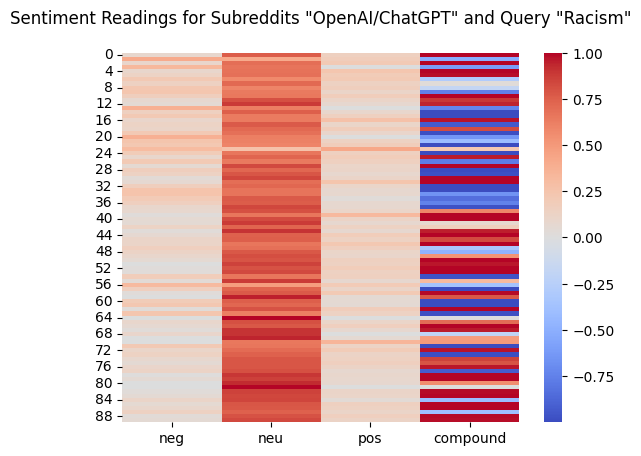

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Convert the list of sentiment scores to a Pandas DataFrame
df = pd.DataFrame(sentiment_scores)

# Create a heatmap of the sentiment scores
plt.title('Sentiment Readings for Subreddits "OpenAI/ChatGPT" and Query "Racism"\n')
sns.heatmap(df, cmap='coolwarm', annot=False, fmt='.3f')

#Keywords (Prejudice, Racial Bias, Bias) and ChatGPT

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

# Authenticate with Reddit's API using your client ID and secret
client_id = 'EkgggRiSIn1OUAMxZeCTfA'
client_secret = '0RphWUYoRz1ByW6OL-nshYo4mwpnDg'
username = 'Kiiii19'
password = 'CS483project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

query = 'bias'
subreddit_name = 'chatgpt'
limit = 100
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(query, limit=limit)

bias_count = 0
chatgpt_count = 0
both_count = 0
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(query, limit=limit)

for post in posts:
    if 'bias' in post.title.lower() or 'bias' in post.selftext.lower() and 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        both_count +=1
    if 'bias' in post.title.lower() or 'bias' in post.selftext.lower():
        bias_count += 1
    if 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        chatgpt_count += 1

counts = {'Word': ['bias', 'chatgpt', 'both'], 'Count': [bias_count, chatgpt_count, both_count]}
df = pd.DataFrame(counts)
print(df)

plt.bar(counts['Word'], counts['Count'])
plt.title('Occurrences of "bias" and "chatgpt"')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



        Word  Count
0  prejudice     24
1    chatgpt     30
2       both     19


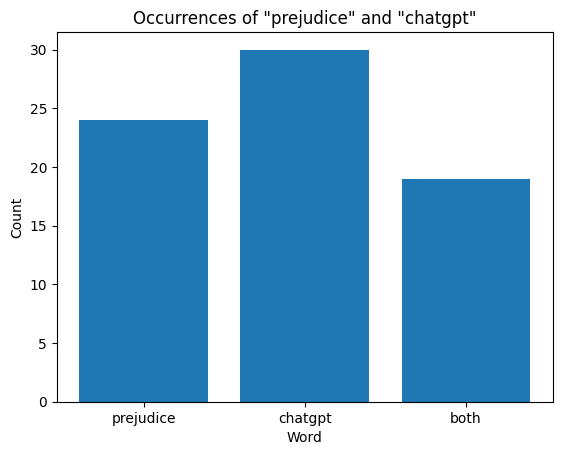

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

# Authenticate with Reddit's API using your client ID and secret
client_id = 'EkgggRiSIn1OUAMxZeCTfA'
client_secret = '0RphWUYoRz1ByW6OL-nshYo4mwpnDg'
username = 'Kiiii19'
password = 'CS483project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

# Define the query parameters for your search
query = 'prejudice'
subreddit_name = 'chatgpt'
limit = 100

# Search for posts containing the query in a specific subreddit
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(query, limit=limit)

bias_count = 0
chatgpt_count = 0
both_count = 0

# Process each post and count occurrences of 'racial bias' and 'chatgpt'
for post in posts:
    if 'prejudice' in post.title.lower() or 'prejudice' in post.selftext.lower() and 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        both_count +=1
    if 'prejudice' in post.title.lower() or 'prejudice' in post.selftext.lower():
        bias_count += 1
    if 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        chatgpt_count += 1

counts = {'Word': ['prejudice', 'chatgpt', 'both'], 'Count': [bias_count, chatgpt_count, both_count]}
df = pd.DataFrame(counts)
print(df)

plt.bar(counts['Word'], counts['Count'])
plt.title('Occurrences of "prejudice" and "chatgpt"')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



          Word  Count
0  racial bias      2
1      chatgpt      8
2         both      6


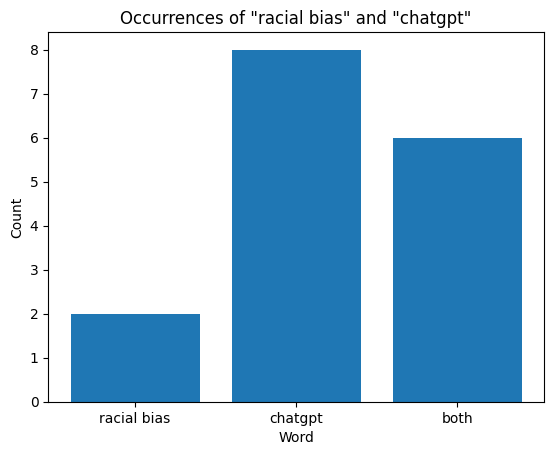

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

# Authenticate with Reddit's API using your client ID and secret
client_id = 'EkgggRiSIn1OUAMxZeCTfA'
client_secret = '0RphWUYoRz1ByW6OL-nshYo4mwpnDg'
username = 'Kiiii19'
password = 'CS483project'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=username,
    password=password,
    user_agent='my_bot/0.0.1'
)

# Define the query parameters for your search
query = 'racial bias'
subreddit_name = 'chatgpt'
limit = 100

# Search for posts containing the query in a specific subreddit
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(query, limit=limit)

bias_count = 0
chatgpt_count = 0
both_count = 0

# Process each post and count occurrences of 'racial bias' and 'chatgpt'
for post in posts:
    if 'racial bias' in post.title.lower() or 'racial bias' in post.selftext.lower() and 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        both_count +=1
    if 'racial bias' in post.title.lower() or 'racial bias' in post.selftext.lower():
        bias_count += 1
    if 'chatgpt' in post.title.lower() or 'chatgpt' in post.selftext.lower():
        chatgpt_count += 1

counts = {'Word': ['racial bias', 'chatgpt', 'both'], 'Count': [bias_count, chatgpt_count, both_count]}
df = pd.DataFrame(counts)
print(df)

plt.bar(counts['Word'], counts['Count'])
plt.title('Occurrences of "racial bias" and "chatgpt"')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()
